$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

I run all cells before and update the visulazation part and run take a lot of time.

## `+` Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, Activation, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

## `+` Load & Preprocess CIFAR 10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) =keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

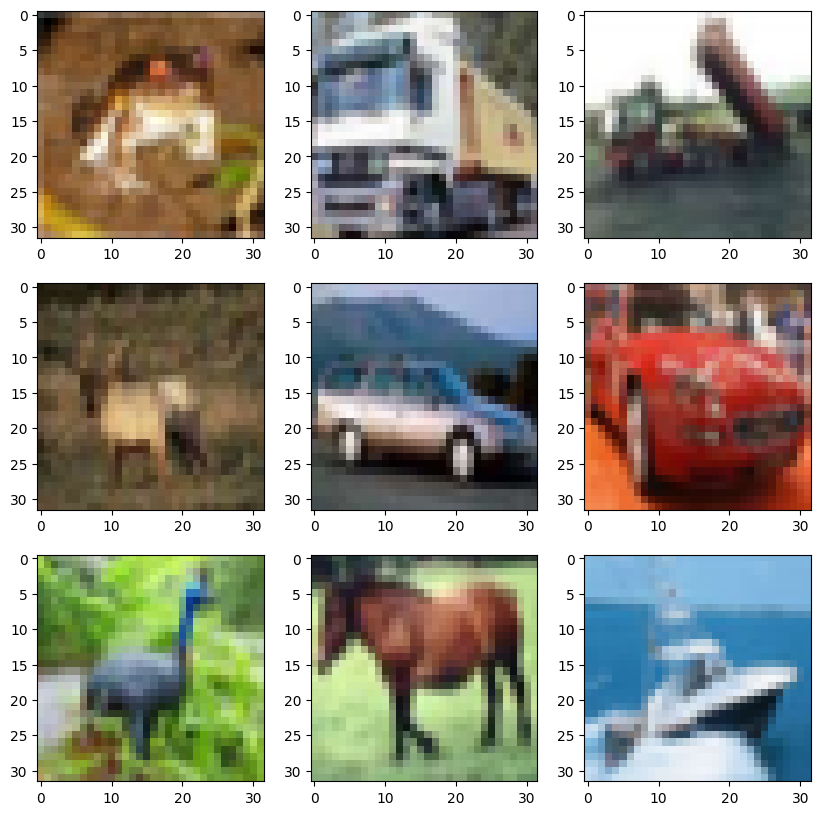

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
plt.show()

### Feature Rescaling

In [ ]:
# Rescale Input
X_train =X_train/255.0
X_test  =X_test/255.0

### OneHotEncode Target Variable

In [ ]:
y_train =keras.utils.to_categorical(y_train)
y_test  =keras.utils.to_categorical(y_test)

## `+` Set Global Parameters

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =10
EPOCHS=50
SEED=124

## `i` Trial no. 1

### Model Training

In [ ]:
model2 = Sequential()
model2.add(Input(shape=X_train.shape[1:]))
model2.add(Flatten())


model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Activation('relu'))

model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,466 (779.16 KB)

 Trainable params: 199,274 (778.41 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.20)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2417 - loss: 2.2560 - val_accuracy: 0.3523 - val_loss: 1.8248
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3535 - loss: 1.8014 - val_accuracy: 0.3772 - val_loss: 1.7268
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3795 - loss: 1.7321 - val_accuracy: 0.3920 - val_loss: 1.7088
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3990 - loss: 1.6924 - val_accuracy: 0.3526 - val_loss: 1.8652
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4090 - loss: 1.6553 - val_accuracy: 0.4305 - val_loss: 1.6259
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4180 - loss: 1.6357 - val_accuracy: 0.4194 - val_loss: 1.6171
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4312 - loss: 1.6007 - val_accuracy: 0.4524 - val_loss: 1.5639
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4373 - loss: 1.5841 - val_accuracy: 

In [ ]:
loss,acc=model2.evaluate(X_train, y_train)
print(f"Accuracy training: {acc}")

loss,acc_val=model2.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5984 - loss: 1.1569
Accuracy training: 0.5781599879264832
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4983 - loss: 1.4120
Accuracy testing: 0.49300000071525574


### Result Visualization

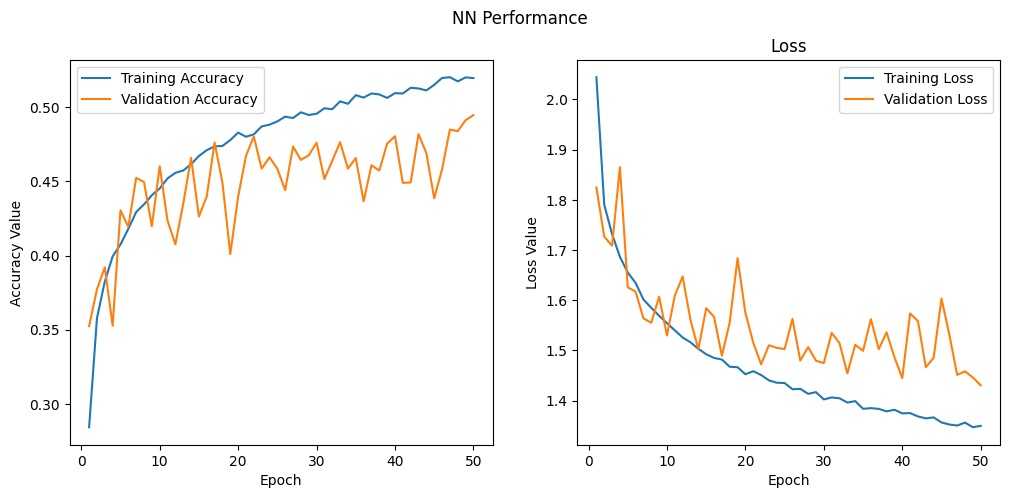

In [ ]:

epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history.history['loss'], label='Training Loss')
ax[1].plot(epochs, history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

## `ii` Trial no. 2

### Model Training

In [ ]:
model_3 = Sequential()
model_3.add(Input(shape=X_train.shape[1:]))
model_3.add(Flatten())


model_3.add(Dense(64))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Activation('relu'))

model_3.add(Dense(32, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))


model_3.add(Dense(8, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,522 (779.38 KB)

 Trainable params: 199,314 (778.57 KB)

 Non-trainable params: 208 (832.00 B)

In [ ]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_2=model_3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.20)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1889 - loss: 2.2713 - val_accuracy: 0.3069 - val_loss: 1.8948
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2906 - loss: 1.9287 - val_accuracy: 0.3212 - val_loss: 1.8566
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3185 - loss: 1.8566 - val_accuracy: 0.3644 - val_loss: 1.7772
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3504 - loss: 1.7998 - val_accuracy: 0.3751 - val_loss: 1.7292
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3596 - loss: 1.7702 - val_accuracy: 0.3850 - val_loss: 1.6959
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3694 - loss: 1.7394 - val_accuracy: 0.4152 - val_loss: 1.6397
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3800 - loss: 1.7215 - val_accuracy: 0.3794 - val_loss: 1.7202
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3826 - loss: 1.6957 - val_accuracy: 0

### Model Evaluation

In [ ]:
loss,acc=model_3.evaluate(X_train, y_train)
print(f"Accuracy training: {acc}")

loss,acc_val=model_3.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5511 - loss: 1.2925
Accuracy training: 0.5353800058364868
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4733 - loss: 1.4838
Accuracy testing: 0.4717000126838684


### Result Visualization

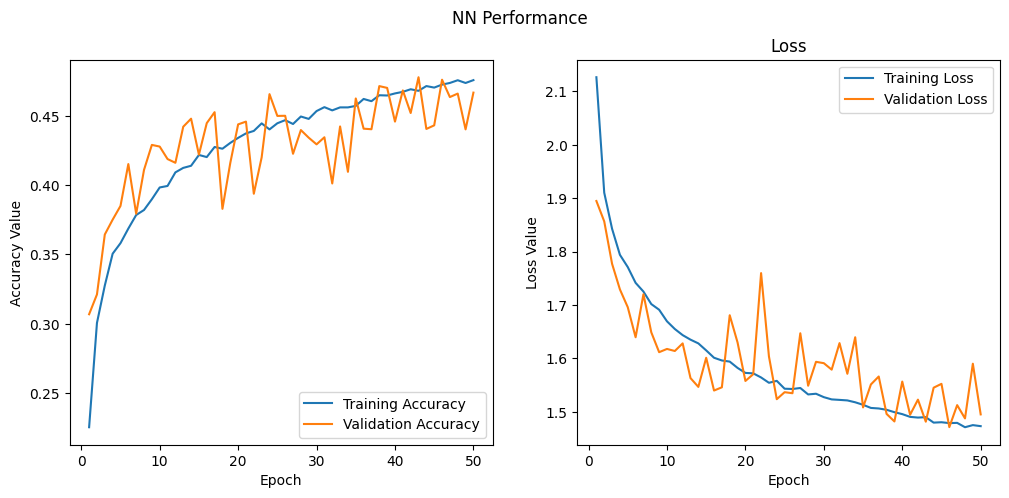

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_2.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_2.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

## `ii` Trial no. 3

### Model Training

In [ ]:
mm = Sequential()
mm.add(Input(shape=X_train.shape[1:]))
mm.add(Flatten())


mm.add(Dense(256))
mm.add(BatchNormalization())
mm.add(Dropout(0.4))
mm.add(Activation('relu'))

mm.add(Dense(128))
mm.add(BatchNormalization())
mm.add(Dropout(0.4))
mm.add(Activation('relu'))


mm.add(Dense(10, activation='softmax'))

mm.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,410 (3.14 MB)

 Trainable params: 821,642 (3.13 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
mm.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# EPOCHS=300

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_3 = mm.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2564 - loss: 2.1792 - val_accuracy: 0.3651 - val_loss: 1.7757
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3558 - loss: 1.8040 - val_accuracy: 0.3652 - val_loss: 1.7867
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3960 - loss: 1.6958 - val_accuracy: 0.4254 - val_loss: 1.6367
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4188 - loss: 1.6359 - val_accuracy: 0.4373 - val_loss: 1.5915
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4362 - loss: 1.5750 - val_accuracy: 0.4501 - val_loss: 1.5533
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4472 - loss: 1.5540 - val_accuracy: 0.4636 - val_loss: 1.5193
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4604 - loss: 1.5123 - val_accuracy: 0.4701 - val_loss: 1.5209
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4646 - loss: 1.4911 - val_acc

### Model Evaluation

In [ ]:
loss,acc=mm.evaluate(X_train, y_train)
print(f"Accuracy training: {acc}")

loss,acc_val=mm.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6062 - loss: 1.1231
Accuracy training: 0.5876200199127197
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5088 - loss: 1.3507
Accuracy testing: 0.507099986076355


### Result Visualization

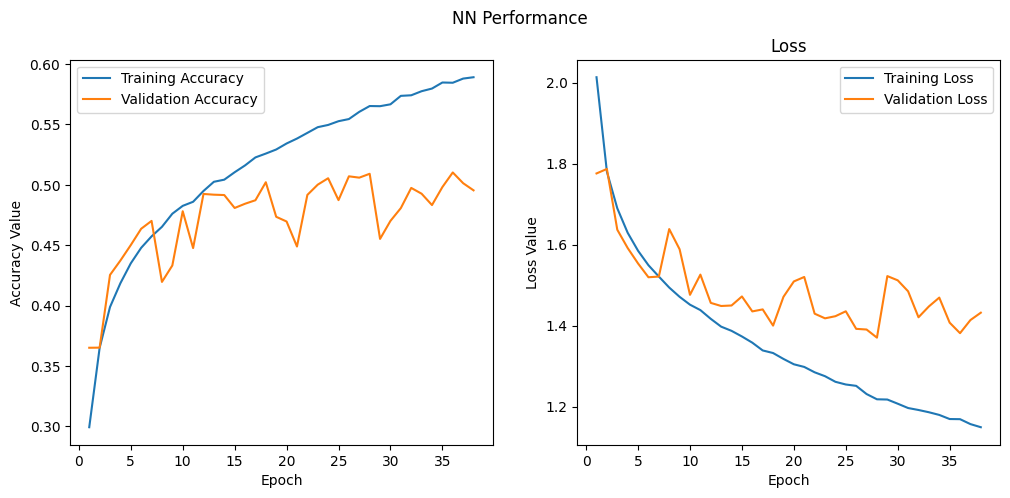

In [ ]:
epochs = range(1, len(history_3.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_3.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_3.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_3.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_3.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();


## `ii` Trial no. 4

### Model Training

In [ ]:
model_4 = Sequential()
model_4.add(Input(shape=X_train.shape[1:]))
model_4.add(Flatten())


model_4.add(Dense(512))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Activation('relu'))

model_4.add(Dense(256))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Activation('relu'))

model_4.add(Dense(128))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Activation('relu'))


model_4.add(Dense(10, activation='softmax'))

model_4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
model_4.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
EPOCHS=350

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_4 = model_4.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.1908 - loss: 2.4718 - val_accuracy: 0.3671 - val_loss: 1.7991
Epoch 2/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.2980 - loss: 1.9666 - val_accuracy: 0.4023 - val_loss: 1.7010
Epoch 3/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3378 - loss: 1.8286 - val_accuracy: 0.3954 - val_loss: 1.6881
Epoch 4/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.3714 - loss: 1.7437 - val_accuracy: 0.4081 - val_loss: 1.6545
Epoch 5/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3952 - loss: 1.6844 - val_accuracy: 0.4338 - val_loss: 1.5955
Epoch 6/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4065 - loss: 1.6518 - val_accuracy: 0.4112 - val_loss: 1.6444
Epoch 7/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4216 - loss: 1.6072 - val_accuracy: 0.4475 - val_loss: 1.5379
Epoch 8/350
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4354 - loss: 1

### Model Evaluation

In [ ]:
loss,acc=model_4.evaluate(X_train, y_train)
print(f"Accuracy training: {acc}")

loss,acc_val=model_4.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6112 - loss: 1.1040
Accuracy training: 0.5945000052452087
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5246 - loss: 1.3323
Accuracy testing: 0.5194000005722046


### Result Visualization

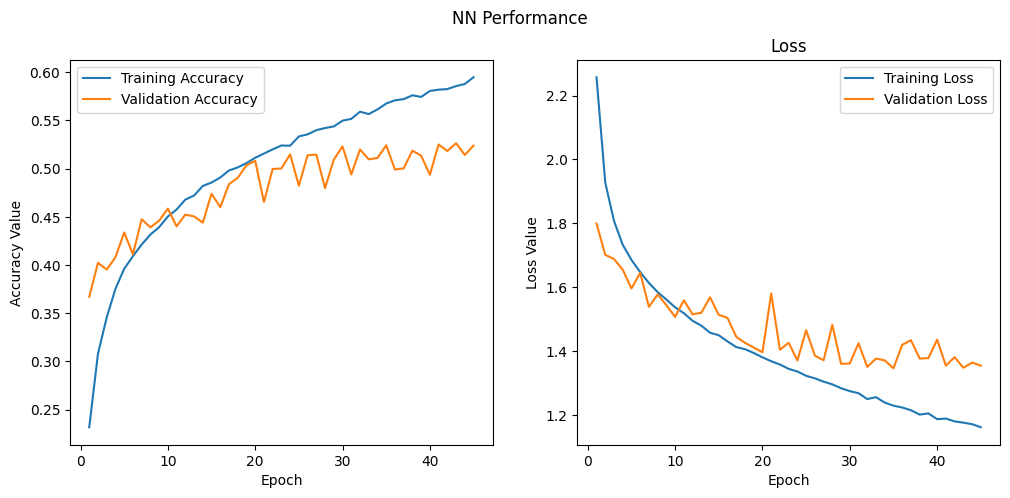

In [ ]:
epochs = range(1, len(history_4.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_4.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_4.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_4.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_4.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();


## `ii` Trial no. 5

### Model Training

In [ ]:
model_5 = Sequential()
model_5.add(Input(shape=X_train.shape[1:]))
model_5.add(Flatten())


model_5.add(Dense(512))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))

model_5.add(Dense(256))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))

model_5.add(Dense(128))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))


model_5.add(Dense(10, activation='softmax'))

model_5.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
model_5.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
EPOCHS=200
BATCH_SIZE=128

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_5 = model_5.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.2419 - loss: 2.4392 - val_accuracy: 0.3283 - val_loss: 1.8603
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3322 - loss: 1.9474 - val_accuracy: 0.3898 - val_loss: 1.7449
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.3666 - loss: 1.8037 - val_accuracy: 0.3948 - val_loss: 1.6845
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.3836 - loss: 1.7457 - val_accuracy: 0.3978 - val_loss: 1.7068
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.4011 - loss: 1.6883 - val_accuracy: 0.3997 - val_loss: 1.7066
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.4092 - loss: 1.6536 - val_accuracy: 0.4349 - val_loss: 1.5924
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.4157 - loss: 1.6353 - val_accuracy: 0.4533 - val_loss: 1.5373
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.4248 - loss: 1

### Model Evaluation

In [ ]:
loss,acc=model_5.evaluate(X_train, y_train)
print(f"Accuracy training: {acc}")

loss,acc_val=model_5.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6123 - loss: 1.1026
Accuracy training: 0.5950400233268738
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5243 - loss: 1.3333
Accuracy testing: 0.5253000259399414


### Result Visualization

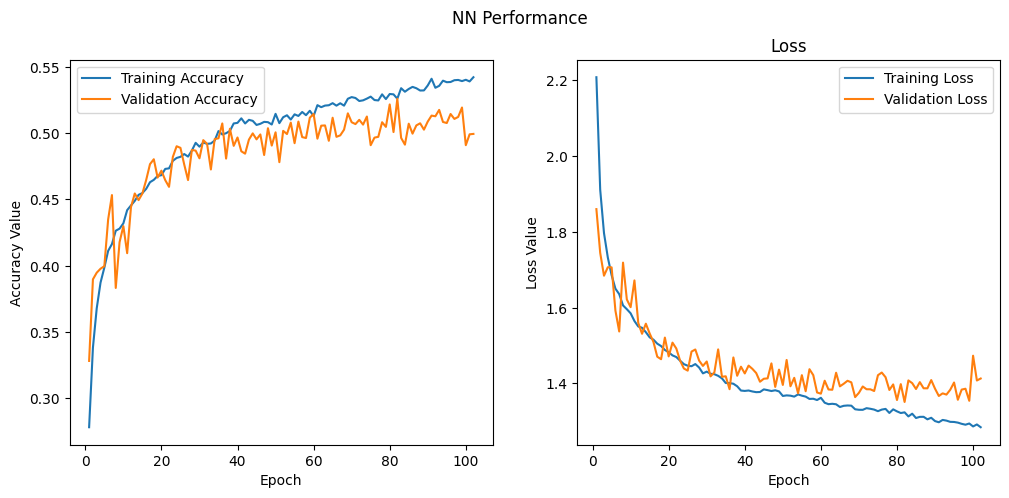

In [ ]:
epochs = range(1, len(history_5.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_5.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_5.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_5.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_5.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [ ]:
pre_trained = ResNet50V2(include_top=False, pooling='avg', weights='imagenet')
for layer in pre_trained.layers:
  layer.trainable = False
pre_trained.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
model_pre = Sequential()
model_pre.add(Input(shape=X_train.shape[1:]))


model_pre.add(pre_trained)

model_pre.add(Dense(256,activation='relu'))
model_pre.add(BatchNormalization())
model_pre.add(Dropout(0.3))

model_pre.add(Dense(10, activation='softmax'))

model_pre.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,092,938 (91.91 MB)

 Trainable params: 527,626 (2.01 MB)

 Non-trainable params: 23,565,312 (89.89 MB)

In [ ]:
model_pre.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist=model_pre.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.15)

### Model Evaluation

In [ ]:
loss_2,acc_2=model_pre.evaluate(X_train, y_train)
print(f"Accuracy training: {acc_2}")

loss_2,acc_val_2=model_pre.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val_2}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8835 - loss: 0.4398
Accuracy training: 0.8106799721717834
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3578 - loss: 2.8857
Accuracy testing: 0.35190001130104065


### Result Visualization

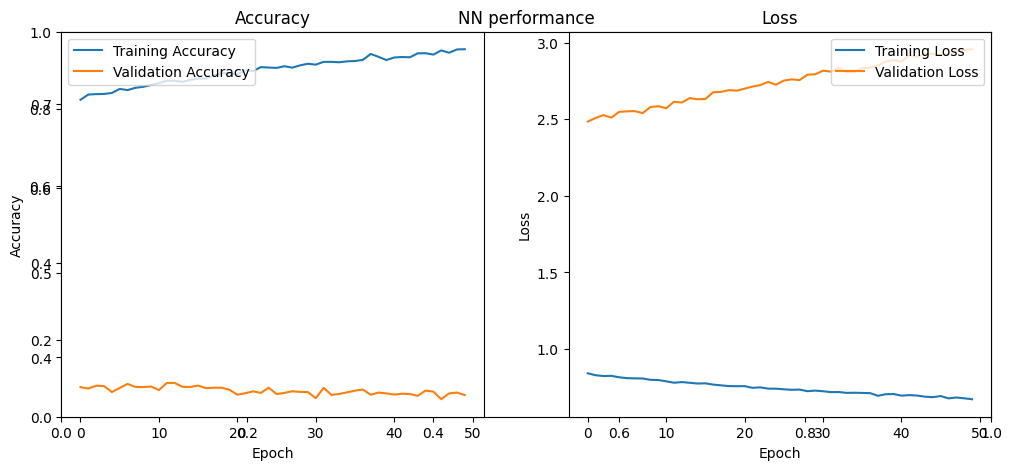

In [ ]:
epochs = range(1, len(history_4.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,hist.history['loss'], label='Training Loss')
ax[1].plot(epochs, hist.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

## `ii` Trial no. 2

### Model Training

In [ ]:
pre_trained.trainable = True

In [ ]:
model_pre2 = Sequential()
model_pre2.add(Input(shape=X_train.shape[1:]))


model_pre2.add(pre_trained)

model_pre2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model_pre2.add(BatchNormalization())
model_pre2.add(Dropout(0.3))

model_pre2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_pre2.add(BatchNormalization())
model_pre2.add(Dropout(0.3))

model_pre2.add(Dense(10, activation='softmax'))

model_pre2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,125,066 (92.03 MB)

 Trainable params: 559,498 (2.13 MB)

 Non-trainable params: 23,565,568 (89.90 MB)

In [ ]:
model_pre2.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
BATCH_SIZE

64

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_pre = model_pre2.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.1437 - loss: 3.3231 - val_accuracy: 0.2614 - val_loss: 2.5227
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.2316 - loss: 2.7212 - val_accuracy: 0.3046 - val_loss: 2.3858
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2765 - loss: 2.5060 - val_accuracy: 0.3268 - val_loss: 2.2999
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2933 - loss: 2.4043 - val_accuracy: 0.3439 - val_loss: 2.2340
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3142 - loss: 2.3140 - val_accuracy: 0.3520 - val_loss: 2.1849
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3368 - loss: 2.2293 - val_accuracy: 0.3576 - val_loss: 2.1445
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3464 - loss: 2.1719 - val_accuracy: 0.3665 - val_loss: 2.1143
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3545 - loss: 2.1

### Model Evaluation

In [ ]:
loss_2,acc_2=model_pre2.evaluate(X_train, y_train)
print(f"Accuracy training: {acc_2}")

loss_2,acc_val_2=model_pre2.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val_2}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5693 - loss: 1.4859
Accuracy training: 0.5388799905776978
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4058 - loss: 1.9318
Accuracy testing: 0.39629998803138733


### Result Visualization

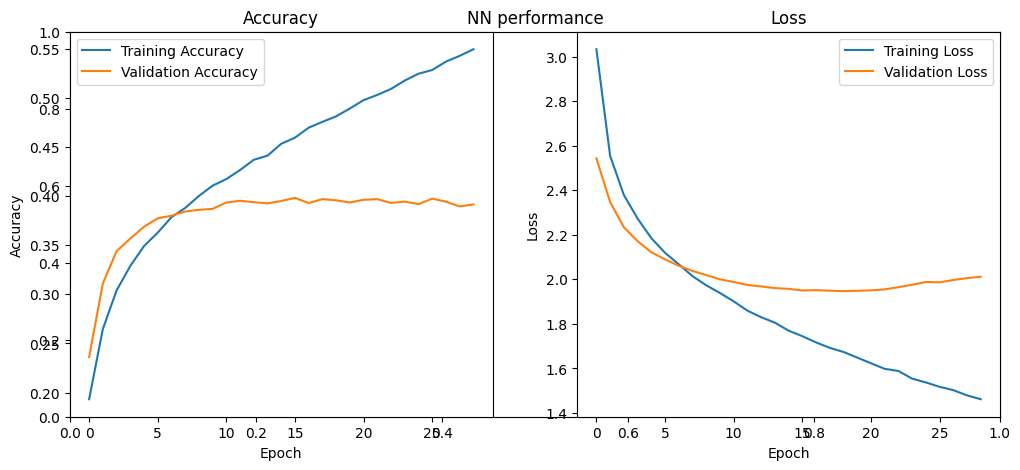

In [ ]:
epochs = range(1, len(history_pre.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_pre.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_pre.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_pre.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_pre.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

## `ii` Trial no. 4

### Model Training

here i use different defination for model

In [ ]:

model_pre4 = tf.keras.Sequential([
    pre_trained,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_pre4.compile(optimizer=keras.optimizers.Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history_pre_2 = model_pre4.fit(X_train, y_train, epochs=50, batch_size=64,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.3078 - loss: 2.2753 - val_accuracy: 0.6310 - val_loss: 1.1000
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6522 - loss: 1.0179 - val_accuracy: 0.7150 - val_loss: 0.8477
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7598 - loss: 0.7036 - val_accuracy: 0.7519 - val_loss: 0.7606
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8246 - loss: 0.5095 - val_accuracy: 0.7662 - val_loss: 0.7279
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8760 - loss: 0.3656 - val_accuracy: 0.7677 - val_loss: 0.7380
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9146 - loss: 0.2532 - val_accuracy: 0.7743 - val_loss: 0.7763
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9371 - loss: 0.1864 - val_accuracy: 0.7825 - val_loss: 0.8065
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9477 - loss: 0.1545 - 

### Model Evaluation

In [ ]:
loss_2,acc_2=model_pre4.evaluate(X_train, y_train)
print(f"Accuracy training: {acc_2}")

loss_2,acc_val_2=model_pre4.evaluate(X_test, y_test)
print(f"Accuracy testing: {acc_val_2}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9318 - loss: 0.2311
Accuracy training: 0.9010999798774719
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7626 - loss: 0.7401
Accuracy testing: 0.7597000002861023


### Result Visualization

In [ ]:
epochs = range(1, len(history_pre_2.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_pre_2.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_pre_2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_pre_2.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_pre_2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();


---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [ ]:
(X_train_minst, y_train_minst), (X_test_minst, y_test_minst) =keras.datasets.mnist.load_data()

In [ ]:
print(f"Shape of X_train: {X_train_minst.shape}")
print(f"Shape of y_train: {y_train_minst.shape}")
print(f"Shape of X_test: {X_test_minst.shape}")
print(f"Shape of y_test: {y_test_minst.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
y_train_minst =keras.utils.to_categorical(y_train_minst)
y_test_minst  =keras.utils.to_categorical(y_test_minst)

### Preview the Images

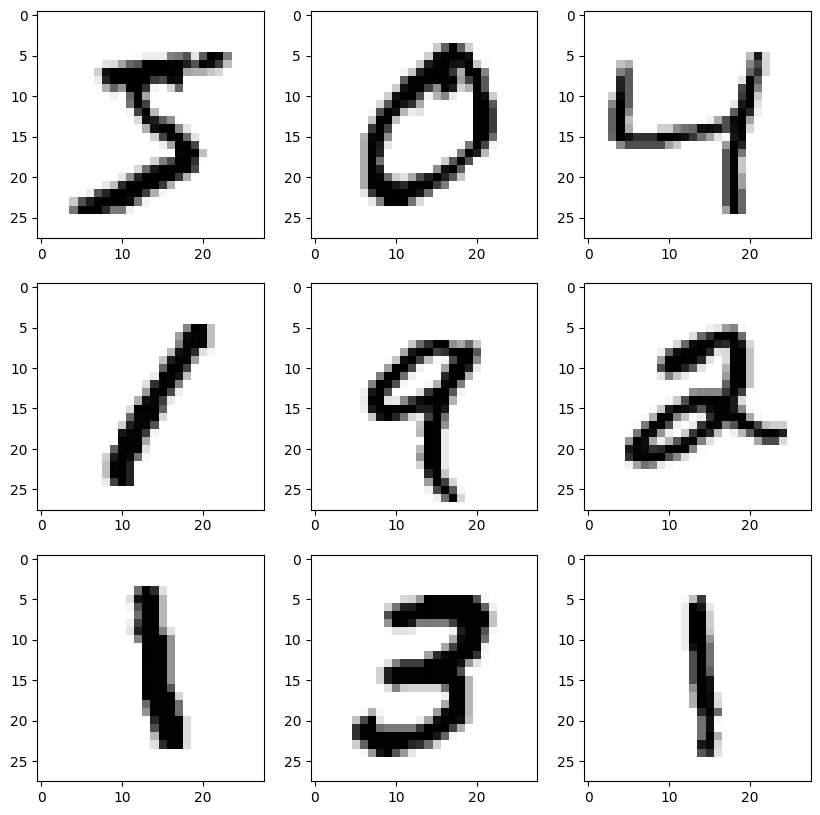

In [ ]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train_minst[i], cmap=plt.cm.binary)
plt.show()

### Rescale Independent Features

In [ ]:
# Rescale the Input
X_train_minst =X_train_minst/255.0
X_test_minst  =X_test_minst/255.0

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =10
EPOCHS=50
SEED=124

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
model_minst = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_minst.compile(optimizer=keras.optimizers.Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_minst = model_minst.fit(X_train_minst, y_train_minst, epochs=50, batch_size=64,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6030 - loss: 1.4115 - val_accuracy: 0.8967 - val_loss: 0.4263
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8861 - loss: 0.4398 - val_accuracy: 0.9174 - val_loss: 0.3130
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9044 - loss: 0.3468 - val_accuracy: 0.9262 - val_loss: 0.2710
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9175 - loss: 0.3002 - val_accuracy: 0.9348 - val_loss: 0.2400
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9274 - loss: 0.2660 - val_accuracy: 0.9411 - val_loss: 0.2193
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9332 - loss: 0.2414 - val_accuracy: 0.9457 - val_loss: 0.2035
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9389 - loss: 0.2185 - val_accuracy: 0.9488 - val_loss: 0.1908
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9424 - loss: 0.2100 - val_accuracy

#### Model Ealuation

In [ ]:
loss_min,acc_min=model_minst.evaluate(X_train_minst, y_train_minst)
print(f"Accuracy training: {acc_min}")

loss_min_test,acc_min_test=model_minst.evaluate(X_test_minst, y_test_minst)
print(f"Accuracy testing: {acc_min_test}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0283
Accuracy training: 0.9908499717712402
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0789
Accuracy testing: 0.9800000190734863


#### Result Visualization

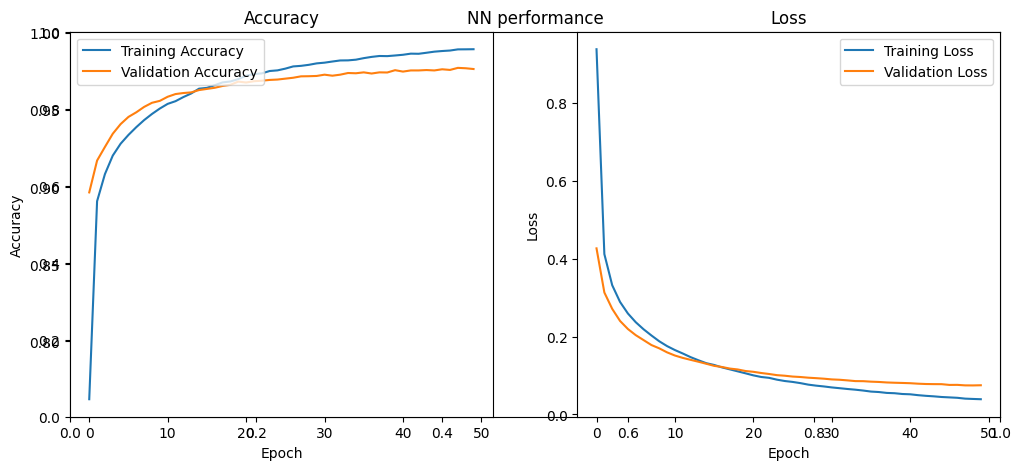

In [ ]:
epochs = range(1, len(history_minst.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_minst.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_minst.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_minst.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_minst.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();


## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train_minst =X_train_minst.reshape(-1,28,28,1)
X_test_minst  =X_test_minst.reshape(-1,28,28,1)
X_train_minst.shape, X_test_minst.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [ ]:
model_cnn=Sequential()

model_cnn.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Flatten())

model_cnn.add(Dense(64,activation="relu"))

model_cnn.add(Dense(10,activation="softmax"))

model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_cnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280,010 (1.07 MB)

 Trainable params: 280,010 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_minst_cnn = model_cnn.fit(X_train_minst, y_train_minst, epochs=50, batch_size=64,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9857 - val_loss: 0.0573
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 119ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9837 - val_loss: 0.0665
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 144s 121ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9883 - val_loss: 0.0495
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 122ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9863 - val_loss: 0.0621
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 112ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9878 - val_loss: 0.0624
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 119ms/step - accuracy: 0.9960 - loss: 0.0113 - val_accuracy: 0.9848 - val_loss: 0.0720
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 136s 111ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9879 - val_loss: 0.0667
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.9961 - 

#### Model Evaluation

In [ ]:
loss_min_,acc_min_=model_cnn.evaluate(X_train_minst, y_train_minst)
print(f"Accuracy training: {acc_min_}")

loss_min_test_,acc_min_test_=model_cnn.evaluate(X_test_minst, y_test_minst)
print(f"Accuracy testing: {acc_min_test_}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9972 - loss: 0.0083
Accuracy training: 0.9957833290100098
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9872 - loss: 0.0540
Accuracy testing: 0.9890999794006348


####  Model visualization

In [ ]:
epochs = range(1, len(history_minst_cnn.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, history_minst_cnn.history['accuracy'], label='Training Accuracy')
ax[0].plot(epochs, history_minst_cnn.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()



ax[1].plot(epochs,history_minst_cnn.history['loss'], label='Training Loss')
ax[1].plot(epochs, history_minst_cnn.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

fig.suptitle('NN Performance')

plt.show();

### Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


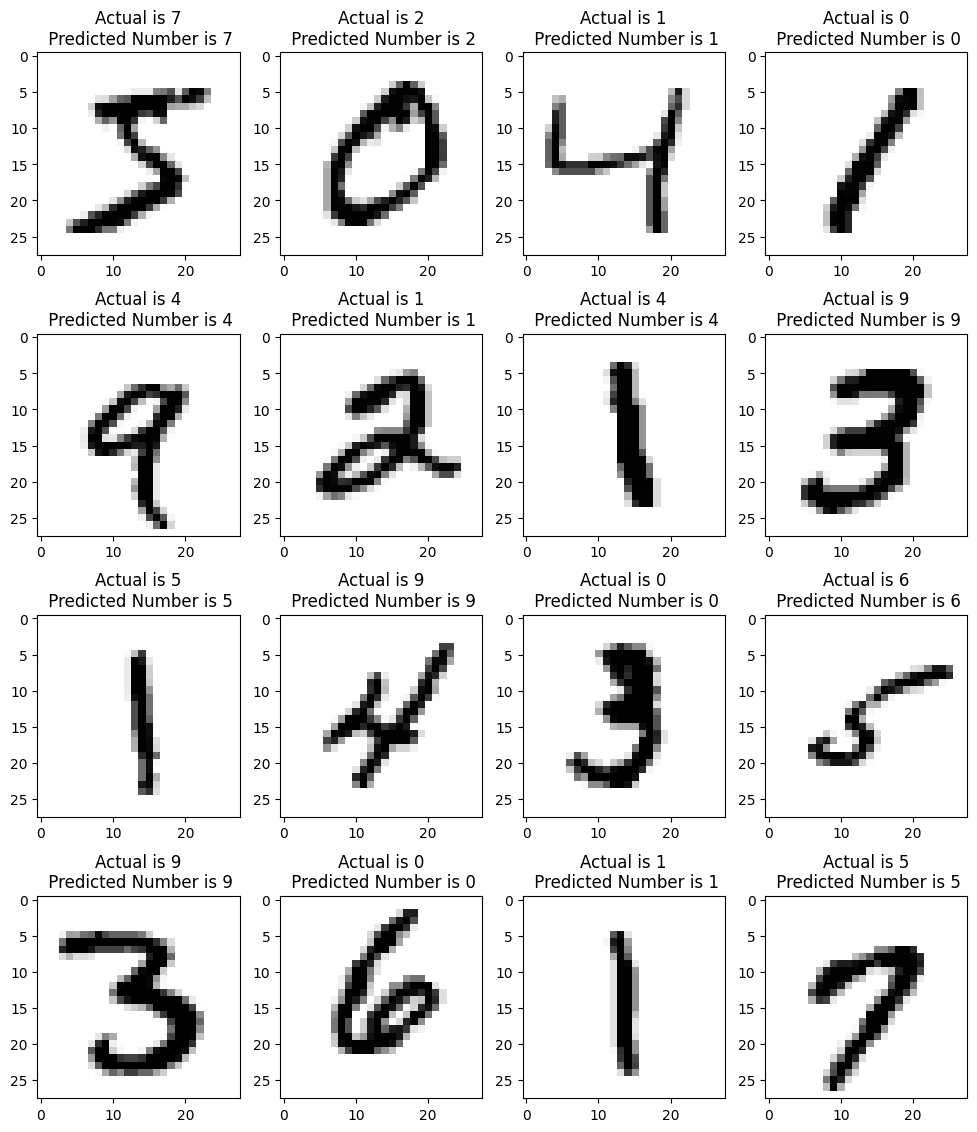

In [ ]:
y_pred = model_cnn.predict(X_test_minst)
X_train_minst_ =X_train_minst.reshape(-1,28,28,1)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train_minst_[i], cmap='binary')
    ax.set(title = f"Actual is {y_test_minst[i].argmax()}\n Predicted Number is {y_pred[i].argmax()}");

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$